# **Type 2 Diabetes classification**

# **2. DATA COLLECTION**

In the project, we try to predict if a patient has **Type 2 Diabetes (T2D)** based on some features which are used as input information.

**[Dataset for Type 2 Diabetes](https://data.mendeley.com/datasets/7m7555vgrn/1)** provides comprehensive information on **5,437 patients**, including **15 (features + target)**. he 12 
features are equipped with meaning as follows:

|No.| Features | Description |
|---|----------|-------------|
|1| age | Age of the patient |
|2| gender | Gender of the patient (Male or Female) |
|3| pulse_rate | Pulse rate of the patient |
|4| systolic_bp | Blood pressure during heart contraction. |
|5| diastolic_bp | Blood pressure during heart rest (mmHg). |
|6| glucose | Blood sugar level (mg/dL). |
|7| height | Height measurement (cm). |
|8| weight | Body mass (kg).  |
|9| bmi | Body Mass Index: Weight (kg) divided by height (m²). |
|10| family_diabetes | Family history of diabetes. |
|11| hypertensive | Status of having high blood pressure. |
|12| family_hypertension | Family history of high blood pressure. |
|13| cardiovascular_disease | Disorders affecting the heart and blood vessels. |
|14| stroke | Condition from interrupted blood flow to the brain. |
|15| diabetic | Status of having diabetes. |

**Import Libraries**

In [137]:
import pandas as pd # pandas for data analysis
import numpy as np  # numpy for complex numerical computation
import matplotlib.pyplot as plt # for initial plot
import seaborn as sns # built above matplotlib for making fancy plot
sns.set_theme() # set default for graphical plots
from IPython.display import HTML

import warnings # compress error warnings

# compress the errors
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Ignore all warnings
    # Your code that may generate warnings goes here

print('Tools Set Up')

Tools Set Up


**Load the Data**

In [138]:
df_raw = pd.read_csv('../selected_dataset/DiaHealth A Bangladeshi Dataset for Type 2 Diabetes Prediction/Diabetes_Final_Data_V2.csv')
df_raw.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No


# **3. EXPLORATORY DATA ANALYSIS**

**Copy Raw Data**

In [139]:
df = df_raw.copy()

## **3.1. Data Cleaning**

### **3.1.1. Handling Missing Value**

### **1.1.1. Check Missing Data**

In [140]:
df.isnull().sum()

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

**Note:** No missing data since it is already cleaned

### **3.1.2. Check Diplicated Data**

In [141]:
print("Missing Data: ", df.duplicated().sum())

Missing Data:  0


**Note:** No Duplicated Data as per the same reason

## **3.2. Summury Statistcs**

In [142]:
df.describe()

,age,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke
count,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000
mean,45.533750,76.768990,133.859849,82.064742,7.540682,1.548571,53.626816,22.472301,0.037337,0.109803,0.039544,0.011587,0.003678
std,14.321155,12.290076,22.293015,12.489593,2.923080,0.080955,10.091550,8.778764,0.189603,0.312673,0.194903,0.107029,0.060545
min,8.000000,5.000000,62.000000,45.000000,0.000000,0.360000,3.000000,1.220000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,69.000000,119.000000,73.000000,6.000000,1.520000,46.700000,19.630000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,76.000000,130.000000,81.000000,6.920000,1.550000,53.000000,21.870000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,84.000000,147.000000,90.000000,8.120000,1.600000,59.900000,24.490000,0.000000,0.000000,0.000000,0.000000,0.000000
max,112.000000,133.000000,231.000000,119.000000,33.460000,1.960000,100.700000,574.130000,1.000000,1.000000,1.000000,1.000000,1.000000


**Note:** Based on the statistics sammary, `bmi` is quite *right-skewed* among all the numerical data

## **3.3. Data Visualization and Feature Selection**

**Count Diabetic Diagbosis**

In [143]:
count_in_diabetes = df['diabetic'].value_counts()
print(count_in_diabetes)

diabetic
No     5093
Yes     344
Name: count, dtype: int64


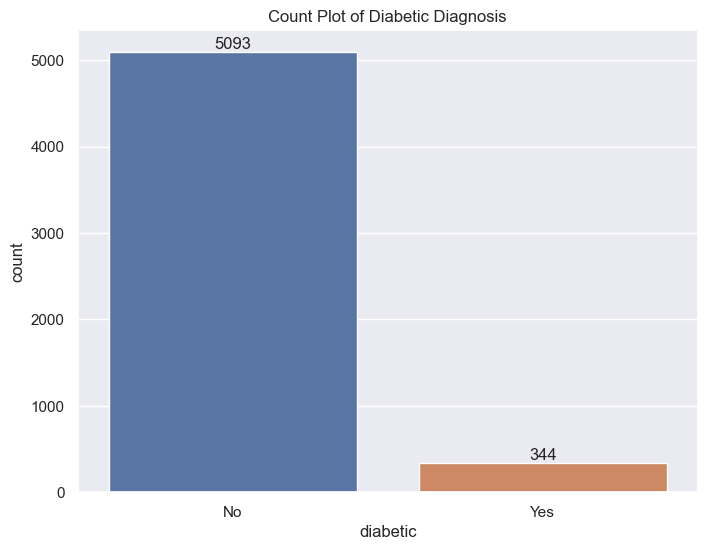

In [144]:
plt.figure(figsize=(8, 6))
sns.countplot(x="diabetic", data=df, hue='diabetic')
plt.title("Count Plot of Diabetic Diagnosis")

def put_numbers_on_bar():
    ax = plt.gca()
    for p in ax.patches:
        height = int(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{height}', (x, y), ha='center', va='bottom')


put_numbers_on_bar()

In here, are numbers of those who are Diabetic and those who are NOT, relative to all the records

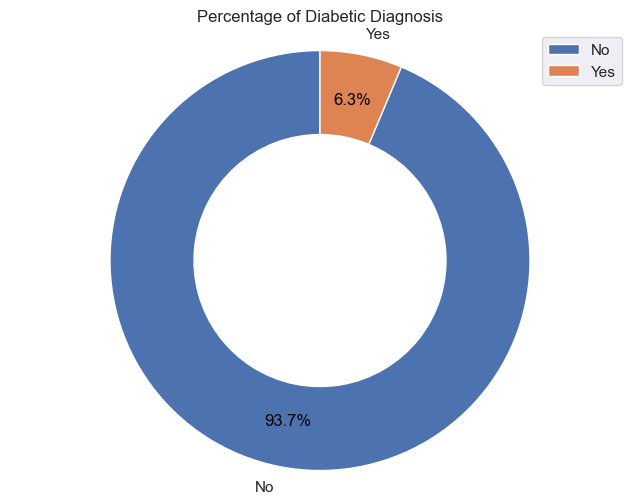

In [145]:
# get data for donut plot
labels = count_in_diabetes.index
sizes = count_in_diabetes.values

plt.figure(figsize=(8, 6))

# Create the donut chart  
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%',   
                                    startangle=90, wedgeprops=dict(width=0.4))  

# Set the position of the text annotations  
for text in autotexts:  
    text.set_color('black')  # Change the text color for better visibility  
    text.set_fontsize(12)  # Adjust font size  
    text.set_position((text.get_position()[0] * 1.3, text.get_position()[1] * 1.3))  

# Equal aspect ratio ensures that pie is drawn as a circle  
plt.legend()  
plt.title("Percentage of Diabetic Diagnosis")  
plt.axis('equal')  
plt.show()

Based on data, the above graph shows that the number of those who are NOT Diabetic outnumbers that of who are NOT, relative to all the records

**Diabetic diagnos by `Gender`**

In [146]:

# print diabetes and nonp
diabetic_male = df[(df['diabetic'] == 'Yes') & (df['gender'] == 'Male')].shape[0]
diabetic_female = df[(df['diabetic'] == 'Yes') & (df['gender'] == 'Female')].shape[0]

non_diabetic_male = df[(df['diabetic'] == 'No') & (df['gender'] == 'Male')].shape[0]
non_diabetic_female = df[(df['diabetic'] == 'No') & (df['gender'] == 'Female')].shape[0]


df_diabetes_gender = pd.DataFrame({
    'Gender' : ['male', 'female'],
    'Non-diabetic' : [non_diabetic_male, non_diabetic_female],
    'Diabetic' : [diabetic_male, diabetic_female],
})
df_diabetes_gender.set_index('Gender', inplace=True)

df_diabetes_gender

# diabetic_male

,Non-diabetic,Diabetic
Gender,,
male,1462,116
female,3631,228


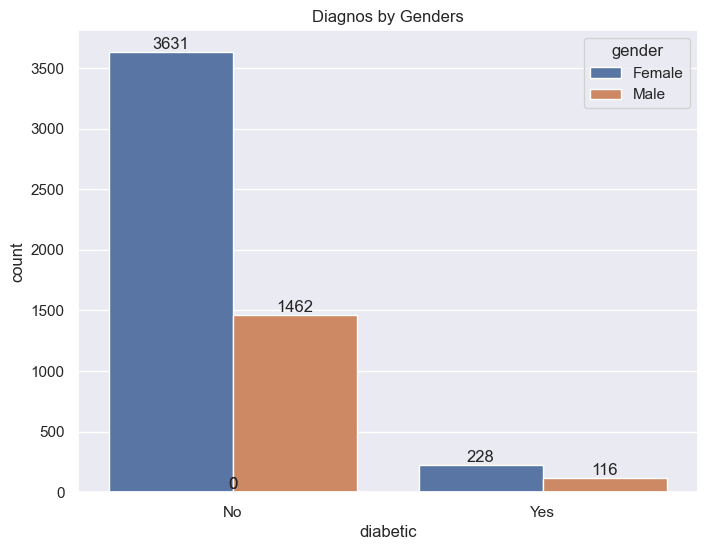

In [147]:

plt.figure(figsize=(8, 6))
sns.countplot(x="diabetic", hue="gender", data=df)
plt.title("Diagnos by Genders")

put_numbers_on_bar()

From the plot, we can say that men are less likely to have DIABETES than women. 

**Histgram of Numerical Data**

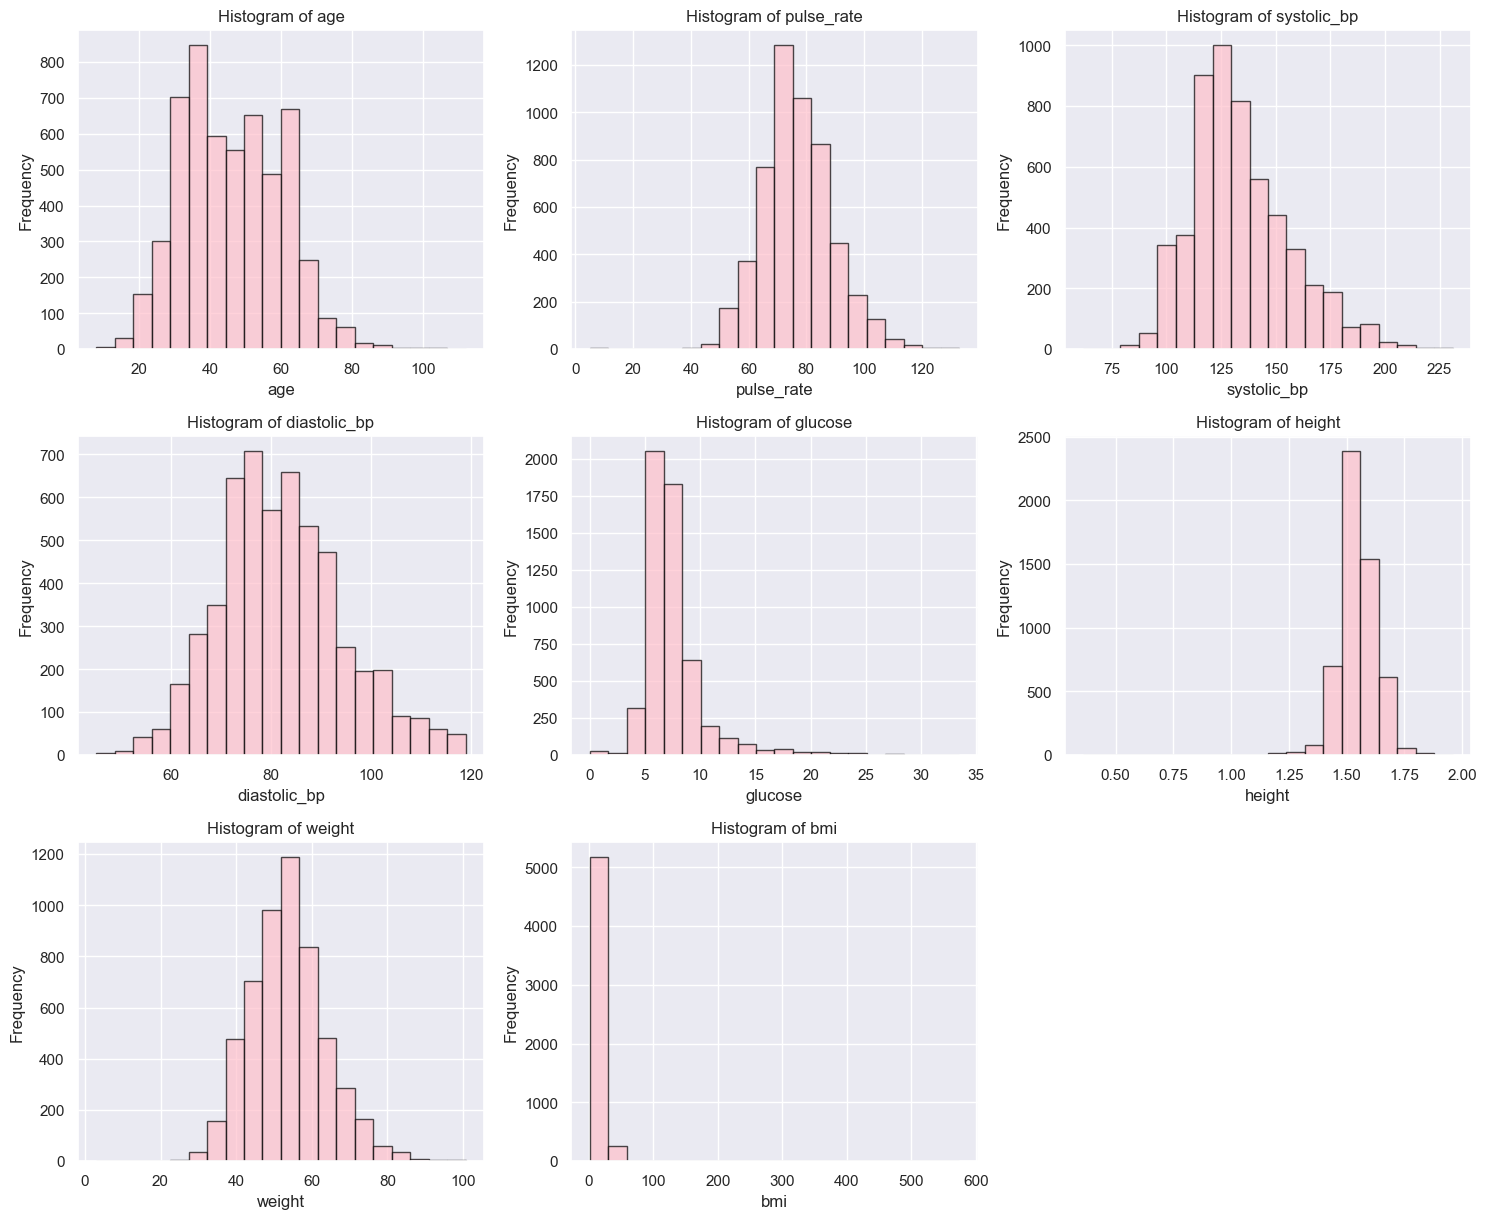

In [148]:

# columns of data we wanna plot histogram
numerical_columns = ['age', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose', 'height', 'weight', 'bmi']

# function for numerical histogram plots
def plot_numerical_histogram(df: pd.DataFrame, cols, bins=20) -> None:
    # Define the number of subplots needed
    num_columns = len(cols)
    rows = (num_columns // 2) + (num_columns % 3 > 0)  # Arrange in 3 columns
    
    # Set up the figure with subplots
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
    axes = axes.flatten()  # Flatten for easy iteration
    
    # Plot each numerical column as a histogram
    for i, column in enumerate(cols):
        axes[i].hist(df[column], bins=bins, color="pink", alpha=0.7, edgecolor="black")
        axes[i].set_title(f"Histogram of {column}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Frequency")
    
    # Hide empty subplots (if any)
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


plot_numerical_histogram(df, numerical_columns)

The distribution of bmi (Body Mass ndex) is quite right-skewed. To be a bit clearer, let’s plot it out:

**Plot histgram of `BMI`**

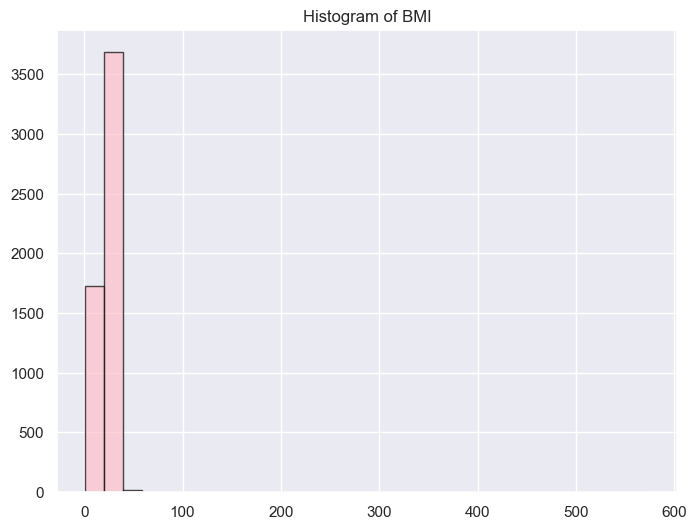

In [149]:

# Histogram of BMI
plt.figure(figsize=(8, 6))
plt.hist(df['bmi'], bins=30, color="pink", alpha=0.7, edgecolor="black")
plt.title("Histogram of BMI")
plt.show()

## **3.3.1. Data Trasformation**

**Maanual Label Encoding**

Because machine knows only numbers, we thus need to represent all string data with some sorts of arbitrary numbers

Label `Gender`: `Male` : 0, `Female` : 1

Label: `Diabetic`: `No` : 0,  `Yes` : 1

In [150]:

# label tthe gender column
gender_label_mapping = {
    'Female' : 0,
    'Male'   : 1,
}
df['gender'] = df['gender'].map(gender_label_mapping)

# label tthe target column
diabetic_label_mapping = {
    'Yes' : 1,
    'No'  : 0,
}
df['diabetic'] = df['diabetic'].map(diabetic_label_mapping)

df.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,0,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,0
1,35,0,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,0
2,62,0,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,0
3,73,1,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,0
4,68,0,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,0


### **3.3.2. Domain Knowledge Application**

**Drop Redundant Columns**

Body  mass  index [BMI](https://en.wikipedia.org/wiki/Body_mass_index#:~:text=The%20BMI%20is%20a%20convenient,obese%20(30%20or%20more))  is  a  value  derived  from  the  mass  (weight)  and  height  of  a person. Thus, technically, BMI alone can describe the two variables. By that, dropping height and weight is recommended for redundant feature reduction.

$$bmi = \frac{weight}{height^2}$$

By that, dropping `height` and `weight` is recommended in terms of *Dimensional Reduction* or *Redundancy Reduction*

In [151]:

# drop the height and weight columns
df = df.drop(['height', 'weight'], axis=1)

df.columns  # it is the original data without height and weight columns

Index(['age', 'gender', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose',
       'bmi', 'family_diabetes', 'hypertensive', 'family_hypertension',
       'cardiovascular_disease', 'stroke', 'diabetic'],
      dtype='object')

**Drop Irrelevant Columns**

We also decided to exclude other features from the classification of Type 2 Diabetes: 

+ Pulse Rate (pulse_rate): 

  - Reason  for  Dropping:  Pulse  rate  is  more  indicative  of  cardiovascular  or fitness-related health and is not strongly linked to the pathophysiology or risk of Type 2 Diabetes. While it might be indirectly affected by diabetes through complications like autonomic neuropathy, it is not a primary predictive feature for diabetes.
 
  - References: Carnethon, M. R., et al. (2003). "Resting heart rate in middle age and  diabetes  development  in  older  age." Diabetes  Care  (Link).  The  Study suggests that heart rate changes are a consequence of diabetes complications rather than a predictor of its onset. 

+ Family History of Hypertension (family_hypertension): 

  - Reason  for  Dropping:  Hypertension  is  a  risk  factor  for  diabetes,  but  family history  of  hypertension  does  not  directly  predict  Type  2  Diabetes.  Instead, hypertensive status (already included) provides stronger and more direct predictive value.

  - References: Dewi Nurhanifah, et.al (2023). "Family History and Hypertension with  Incidence  of  Diabetes  Mellitus  Type  II."  Jurnal  eduhealth,  Volume  14. (Link) significantly highlights that while there is a connection between family history of Hypertension and Type 2 Diabetes, it emphasizes the importance of other factors, such as diet and lifestyle, in the development of diabetes.

+ Cardiovascular Disease (cardiovascular_disease):
 
  - Reason for Dropping: Cardiovascular disease (CVD) is more of an outcome or complication of Type 2 Diabetes rather than a predictor. Including it could lead to data leakage if using a dataset where CVD status arises from diabetes. 

  - References:  Low  Wang,  C.  C.,  et  al.  (2016).  "Cardiovascular  disease  in diabetes." Diabetes Care. (Link) discusses the bidirectional relationship between diabetes and CVD but highlights that CVD is typically a consequence, not a predictor. 

+ Stroke (stroke): 

  - Reason for Dropping: Similar to cardiovascular disease, stroke is a complication  often  resulting  from  poorly  managed  diabetes  and  associated conditions (e.g., hypertension). It is not a primary predictor of diabetes onset.

  - References: Emerging Risk Factors Collaboration (2010). "Diabetes mellitus, fasting  glucose,  and  risk  of  cause-specific  death."  New  England  Journal  of Medicine.  (Link)  suggests  stroke  as  a  complication  associated  with  diabetes rather than an indicator of its development.

In [152]:

# Drop Irrelevant Columns
df = df.drop(['pulse_rate', 'family_hypertension', 'cardiovascular_disease', 'stroke'], axis=1)

print("The remained columns: ", df.columns[:-1].tolist())

The remained columns:  ['age', 'gender', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi', 'family_diabetes', 'hypertensive']


### **3.3.3. Clearing Outlier**

**Numerical Data**

Normally, we often check outliers of only `numerical data`

In [153]:

# numerical columns
numerical_columns = ['age', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi']

**Plot box plots**

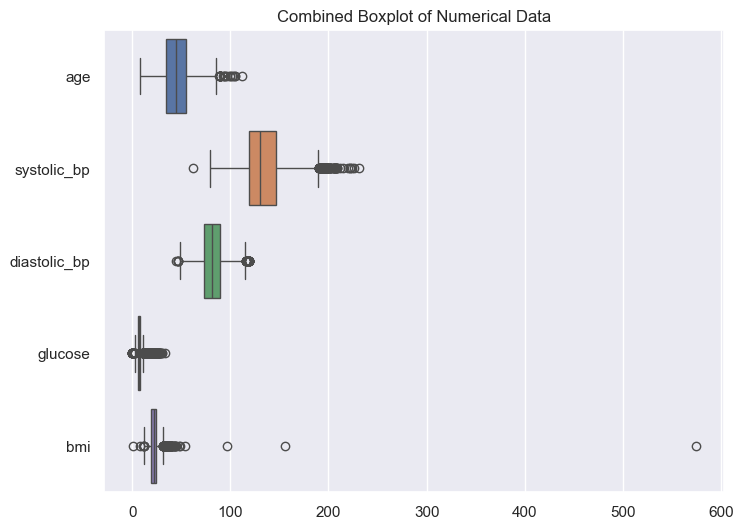

In [154]:

# Plot box plots of numerical data
plt.figure(figsize=(8, 6))
sns.boxplot(df[numerical_columns], orient='h')
plt.title("Combined Boxplot of Numerical Data")
plt.show()

**Function to plot boxplots**

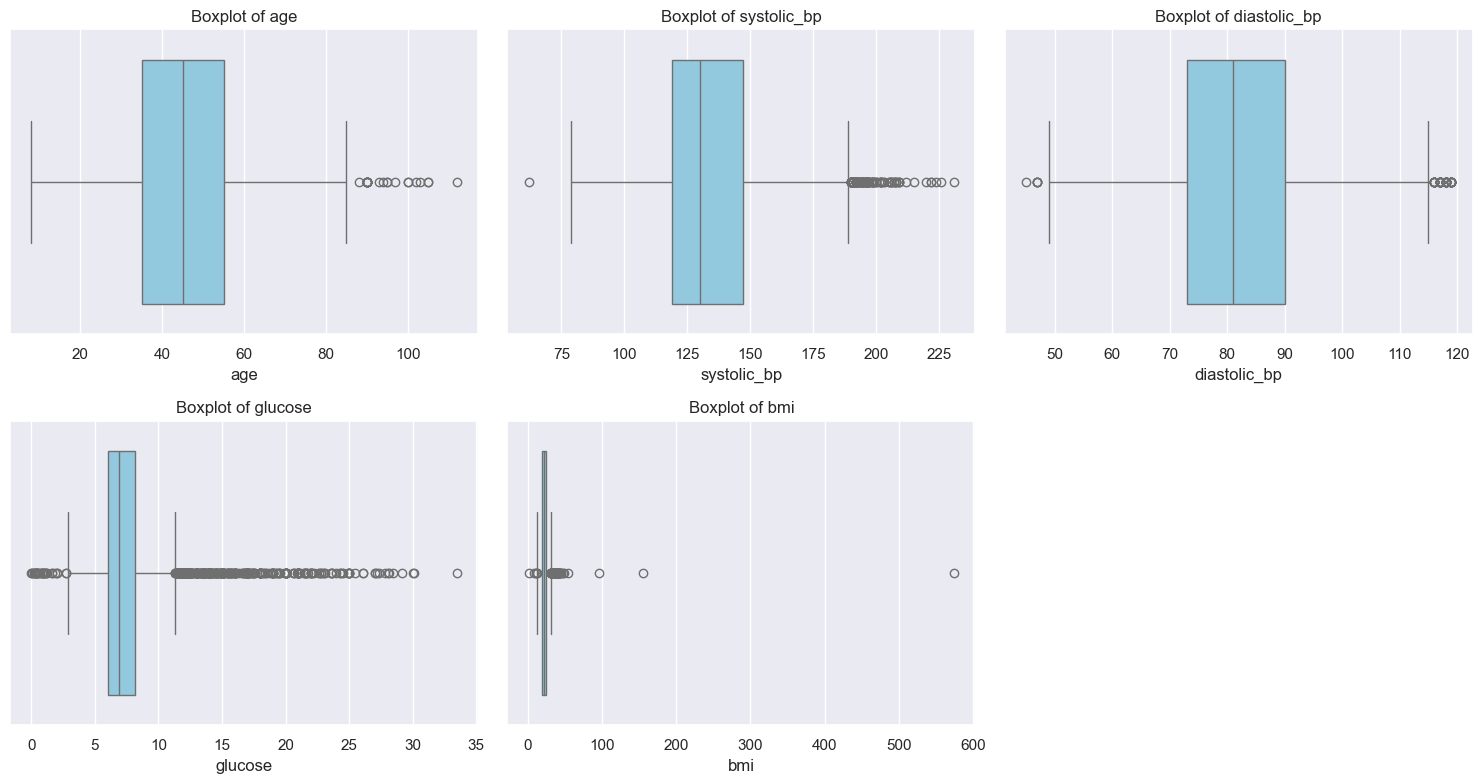

In [155]:

# box plot function
def plot_numerical_boxplot(df: pd.DataFrame, cols) -> None :

    # Define the number of subplots needed
    num_columns = len(cols)
    rows = (num_columns // 3) + (num_columns % 3 > 0)  # Arrange in 3 columns
    
    # Set up the figure with subplots
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
    axes = axes.flatten()  # Flatten for easy iteration
    
    # Plot each numerical column as a boxplot
    for i, column in enumerate(cols):
        sns.boxplot(data=df[column], ax=axes[i], color="skyblue", orient="h")
        axes[i].set_title(f"Boxplot of {column}")
        axes[i].set_xlabel(column)
    
    # Hide empty subplots (if any)
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

plot_numerical_boxplot(df, numerical_columns)

**Clear Outliers by Columns**

Clearing outliers using quartiles in a box plots:

1. Calculate $Q1$ (25th percentile) and $Q3$ (75th percentile). 

2. Compute $IQR$ (Interquartile Range): $IQR = Q3 − Q1$

3. Set bounds for outliers: 
   - Lower Bound:  $Q1 − 1.5 × IQR$
   - Upper Bound:  $Q3 + 1.5 × IQR$ 

4. Identify and remove/adjust data points outside these bounds.
 
5. Outliers are points below the lower bound or above the upper bound. 

In [156]:

# define function to clear outliers given one column
def clear_outliers_iqr(df: pd.DataFrame, column:str) -> pd.DataFrame:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]
    return df


# define function to clear outliers given multiple columns
def clear_outliers_iqr_multiple(df: pd.DataFrame, cols:list) -> pd.DataFrame:
    for col in cols:
        df = clear_outliers_iqr(df, col)
    return df


# note: the below funtion will remove the outliers only in the numerical columns;
# thus, it will not affect the target column and cattegorical columns

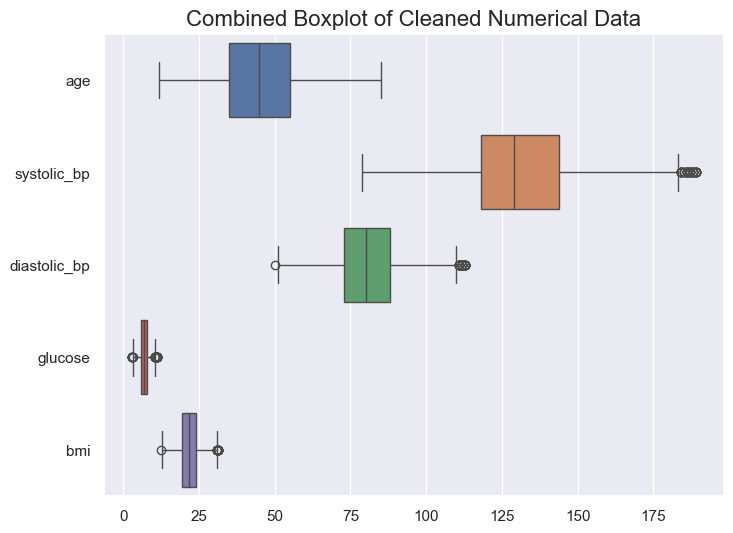

In [157]:

# new df after clearing outliers
df = clear_outliers_iqr_multiple(df, numerical_columns).copy()
# df = clear_outliers_iqr_multiple(df, cols)

# plot the boxplot of the cleaned data
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[numerical_columns], orient='h')
plt.title("Combined Boxplot of Cleaned Numerical Data", fontdict={'fontsize': 16})
plt.show()

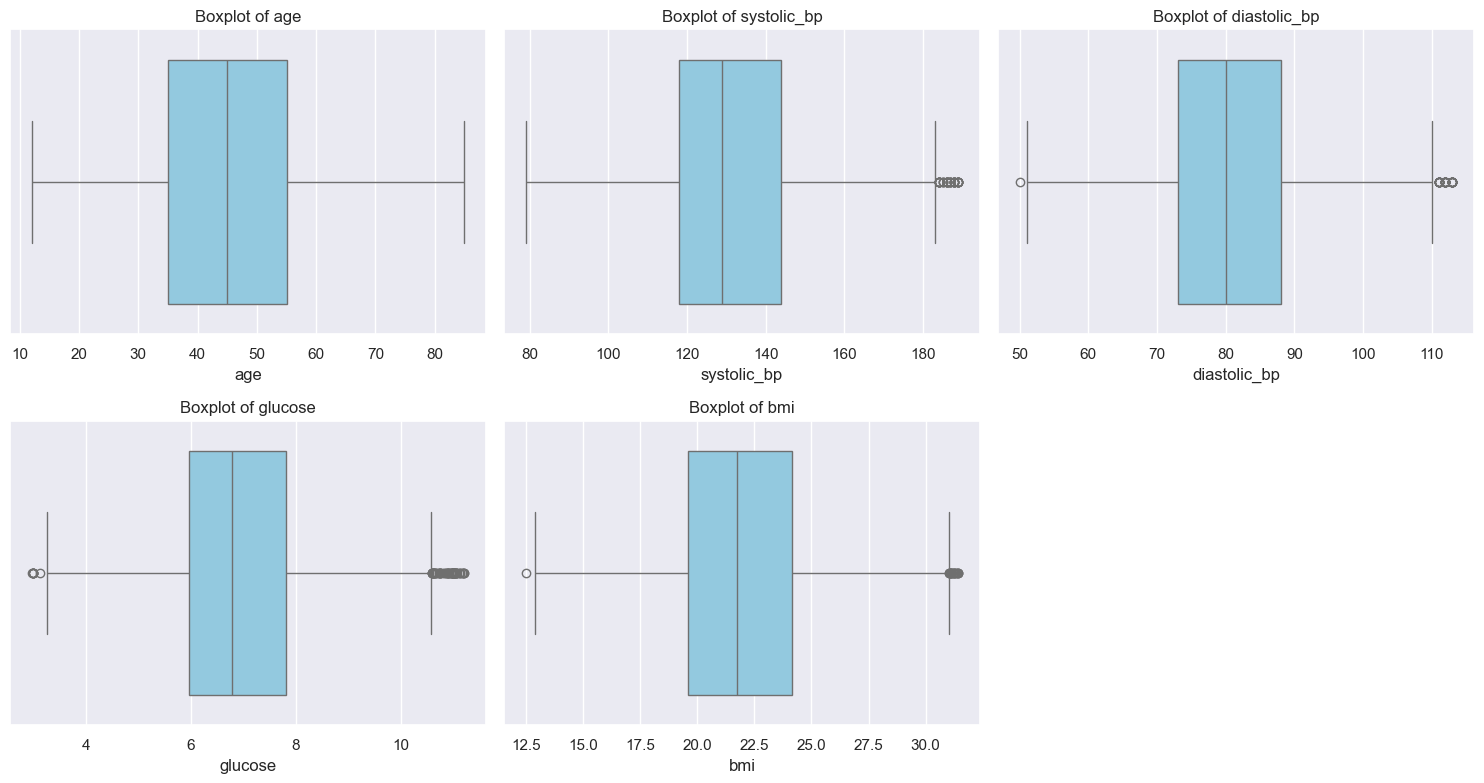

In [158]:

# boxplots of cleaned data
plot_numerical_boxplot(df[numerical_columns], numerical_columns)

**Plot box plots and violin plots**

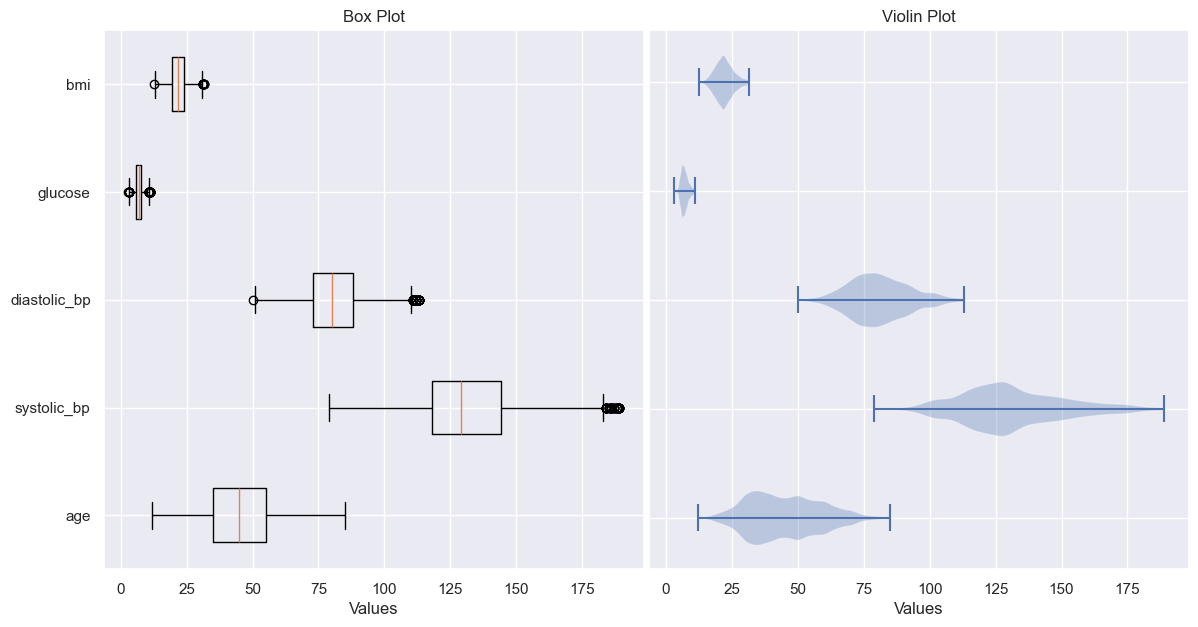

In [159]:

# Create subplots of distribution: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Box Plot on the first subplot
axs[0].boxplot(df[numerical_columns], vert=False)
axs[0].set_title('Box Plot')
axs[0].set_xlabel('Values')
axs[0].set_yticklabels(numerical_columns)

# Violin Plot on the second subplot
axs[1].violinplot(df[numerical_columns], vert=False)
axs[1].set_title('Violin Plot')
axs[1].set_xlabel('Values')
axs[1].set_yticklabels([])

# Adjust layout to prevent overlap
plt.subplots_adjust(wspace=.01)
# plt.tight_layout()

# Show the plots
plt.show()

**KDE plot**

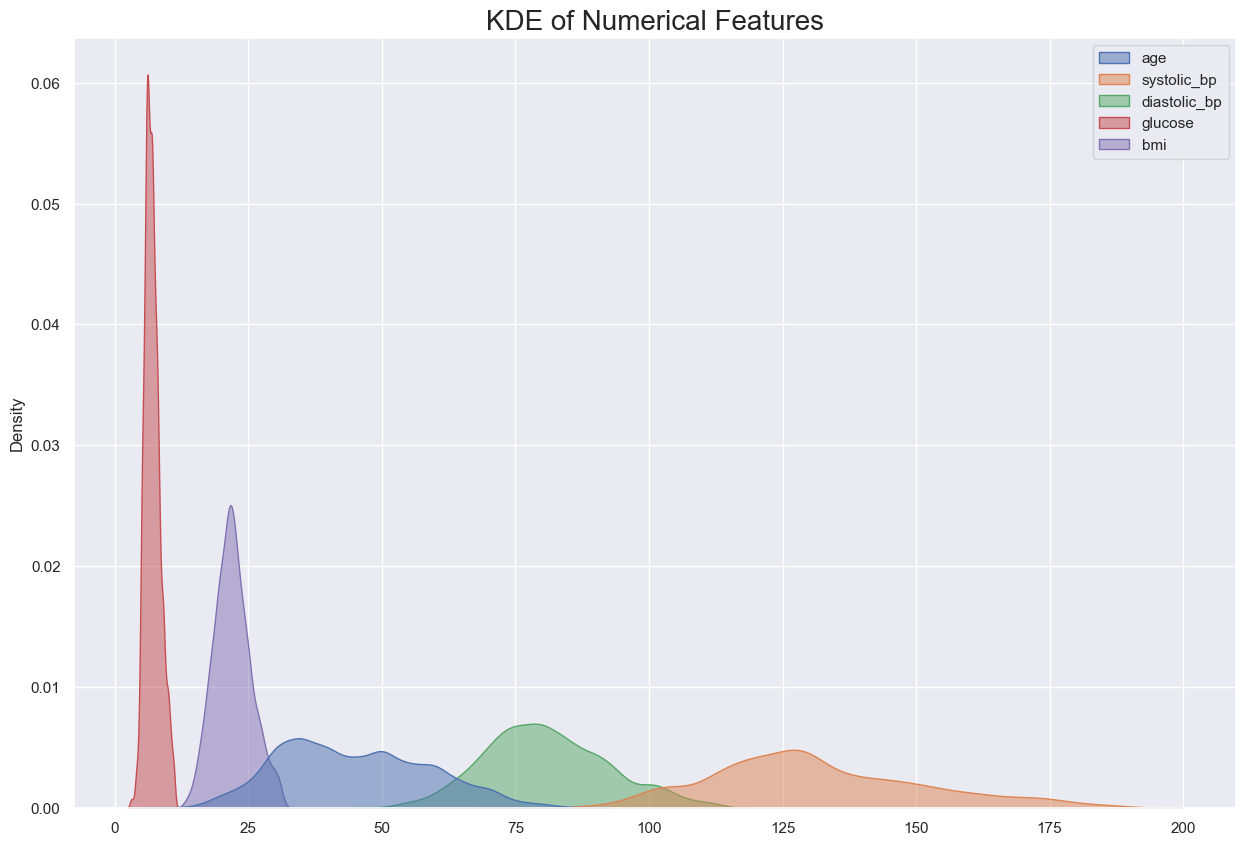

In [160]:

# Plot KDE of numerical features
plt.figure(figsize=(15, 10))
sns.kdeplot(data=df[['age', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi']], fill=True, alpha=0.5)
plt.title("KDE of Numerical Features", fontdict={'fontsize' : 20})
plt.show()

**Correlation Matrix**

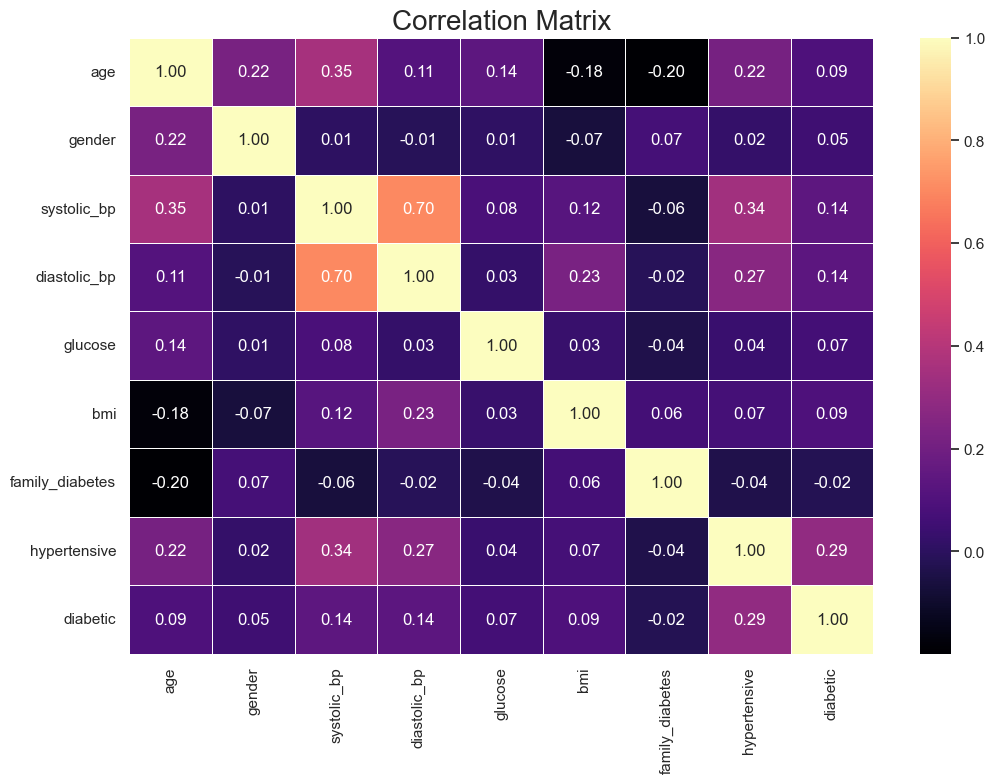

In [161]:

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', fontdict={'fontsize' : 20})
plt.show()

**Note:**

The CORRELATION of the features and target seem to be kinda poor..

**Pair plot**

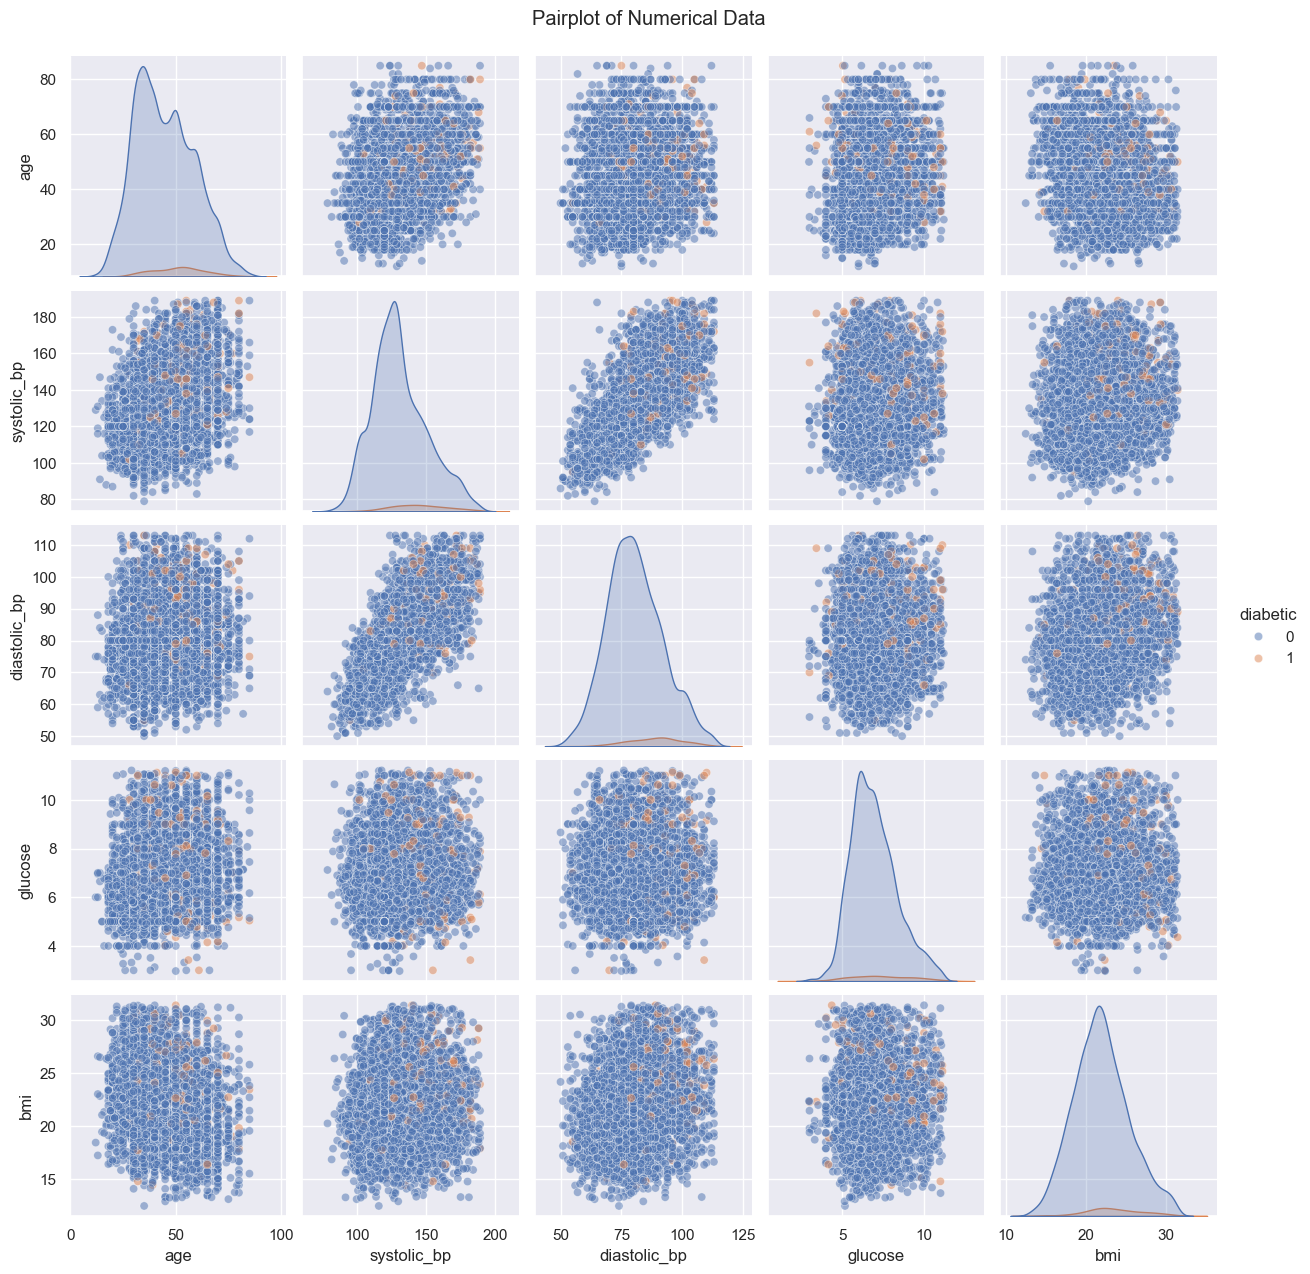

In [162]:

# Plot pairplot of numerical data
sns.pairplot(df.drop(['gender' ,'family_diabetes', 'hypertensive'], axis=1),
             diag_kind='kde',
             plot_kws={"alpha": 0.5}, 
             hue='diabetic')
plt.suptitle("Pairplot of Numerical Data", y=1.02)
plt.show()

# **4. Model Construction**

## **4.1. Machine Learning Models**

As per our project, it is about training models to classify if someone has Type 2 Diabetes or not, so we choose classification models. Classification models are a category of machine learning algorithms designed to predict discrete labels or categories for input data. These models are widely used in tasks such as spam detection, image recognition, medical diagnosis, and sentiment analysis. Below is a comprehensive list of common classification models, grouped by their underlying principles:

+ Linear Models:
    - Logistic Regression: A linear model for binary or multiclass classification that uses a logistic function to estimate probabilities.
    - Linear Discriminant Analysis (LDA): A method that finds a linear combination of features to separate classes. 
    - Support Vector Machines (SVM): A model that finds the optimal hyperplane to separate classes, often using kernel functions for non-linear data.
 
+ Tree-Based Models: 
    - Decision Trees: A model that splits data into branches based on feature values to make predictions. 
    - Random Forest: An ensemble of decision trees that combines their outputs to improve accuracy and reduce overfitting. 
    - Gradient Boosting Machines (GBM): A sequential ensemble technique that builds trees to correct errors from previous trees. 
    - XGBoost: An optimized implementation of gradient boosting with additional regularization and efficiency improvements. 
    - LightGBM: A gradient-boosting framework designed for speed and scalability, particularly with large datasets. 
    - CatBoost:  A  gradient-boosting  algorithm  optimized  for  categorical  data  and handling missing values 


+ Probabilistic Models: 
    - Naive  Bayes:  A  probabilistic  model  based  on  Bayes'  theorem,  assuming independence between features. 
    - Gaussian Naive Bayes: A variant of Naive Bayes that assumes features follow a Gaussian distribution. 

## **4.2. Training and Evaluation**

**Save and Load Data for Future Uasage**

In [163]:

# save df to csv
# df.to_csv('D:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\selected_dataset\DiaHealth A Bangladeshi Dataset for Type 2 Diabetes Prediction\Cleaned_Datasets\Diabetes_Final_Data_Cleaned_v3.csv', index=False)

# load it back
df = pd.read_csv('D:\\School\\ITC\\Y3\\Semet 1\\Intro DS\\Projects\\Diabetes-Classification\\selected_dataset\\DiaHealth A Bangladeshi Dataset for Type 2 Diabetes Prediction\\Cleaned_Datasets\\Diabetes_Final_Data_Cleaned_v3.csv')


### **4.2.1. Class Resampling**

We use over-sampling method

### **4.2.2. Data Scaling**

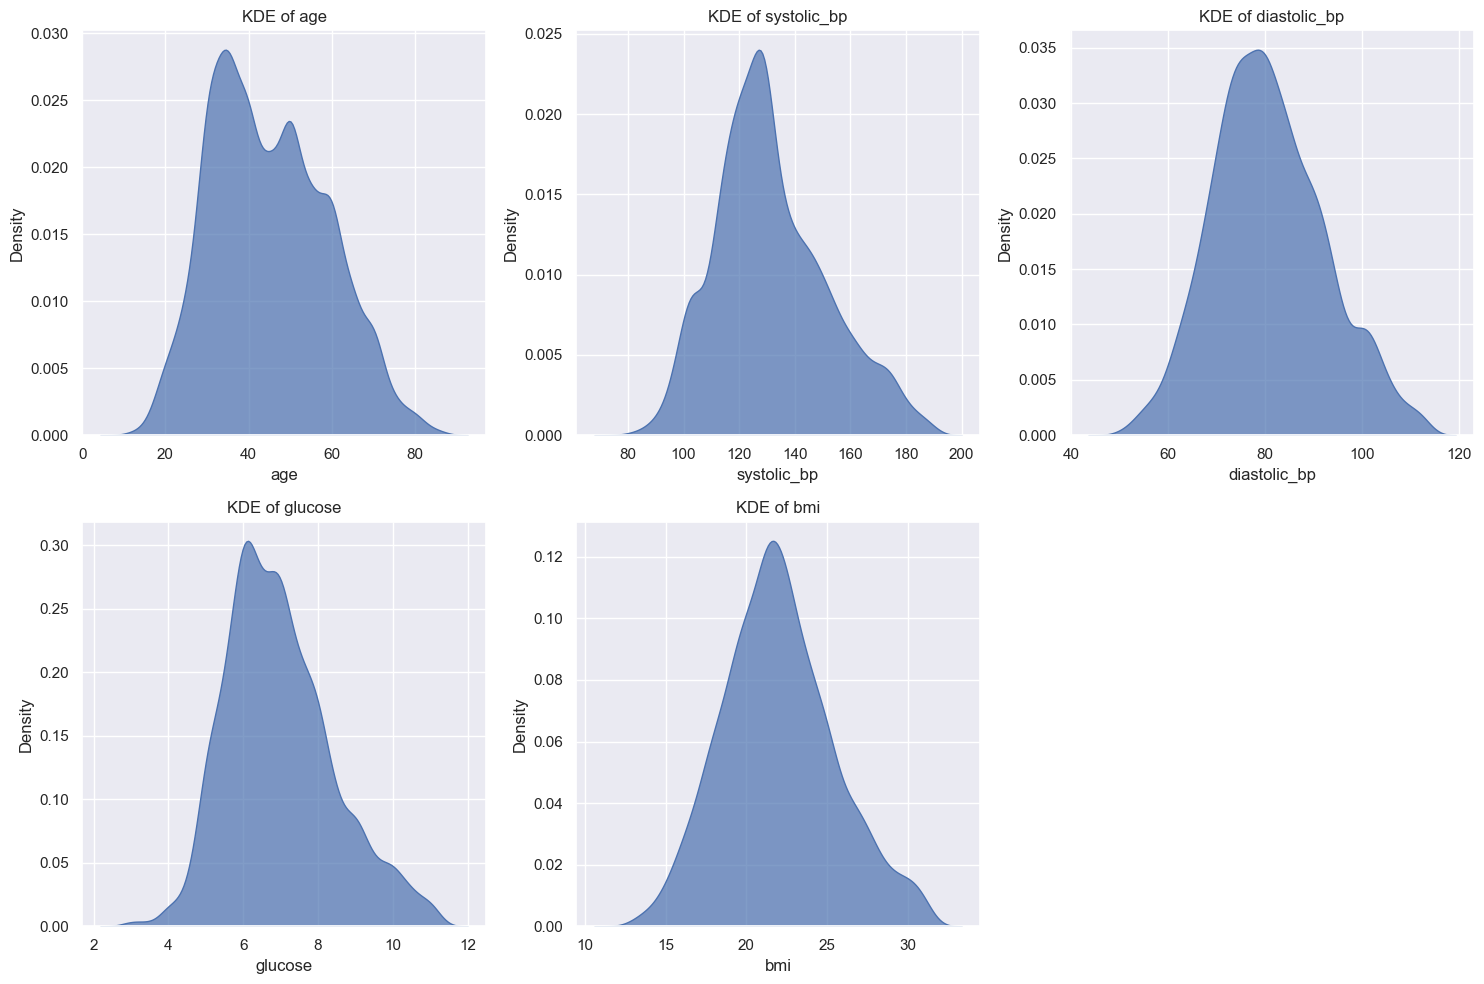

In [164]:

# plot kde of columns
def plot_kde_subplots(df: pd.DataFrame, cols: list) -> None:
    num_columns = len(cols)
    rows = (num_columns // 3) + (num_columns % 3 > 0)  # Arrange in 3 columns

    # Set up the figure with subplots
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
    axes = axes.flatten()  # Flatten for easy iteration

    # Plot KDE for each feature
    for i, column in enumerate(cols):
        sns.kdeplot(data=df[column], fill=True, ax=axes[i], alpha=0.7)
        axes[i].set_title(f"KDE of {column}")
        axes[i].set_xlabel(column)

    # Hide empty subplots (if any)
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout
    # plt.title("Disttribution of Numerical Data")
    plt.tight_layout()
    plt.show()

plot_kde_subplots(df, ['age', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi'])

In favour of our data trends, we are going to scale the numerical data with a combination of scalers.

```py
# specify features to be scaled
features_to_scale = ['age', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi']

# Define the feature categories for scaling
skewed_features = ['glucose', 'systolic_bp']
outlier_features = ['diastolic_bp']
normal_features = ['bmi', 'age']

# Define the scaling transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('power', PowerTransformer(method='yeo-johnson'), skewed_features),
        ('robust', RobustScaler(), outlier_features),
        ('standard', StandardScaler(), normal_features)
    ],
    remainder='passthrough'
)
```

### **4.2.3. Linear Models**

**Logistic Regression**

In [165]:

# logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer

# get data
X = df.drop(['diabetic'], axis=1)
y = df['diabetic']

# resample data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# split resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.3,
    random_state=42)

# specify features to be scaled
features_to_scale = ['age', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi']

# Define the feature categories for scaling
skewed_features = ['glucose', 'systolic_bp']
outlier_features = ['diastolic_bp']
normal_features = ['bmi', 'age']

# Define the scaling transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('power', PowerTransformer(method='yeo-johnson'), skewed_features),
        ('robust', RobustScaler(), outlier_features),
        ('standard', StandardScaler(), normal_features)
    ],
    remainder='passthrough'
)

# Scale the data using the preprocessor
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# train data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# predict
y_pred = model.predict(X_test_scaled)

# evaluation
print("Model: ", type(model).__name__)
print("Confustion Metrix: ")
print(confusion_matrix(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Model:  LogisticRegression
Confustion Metrix: 
[[1136  239]
 [ 362  992]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1375
           1       0.81      0.73      0.77      1354

    accuracy                           0.78      2729
   macro avg       0.78      0.78      0.78      2729
weighted avg       0.78      0.78      0.78      2729



**LDA**

In [166]:

# LDA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer

# get data
X = df.drop(['diabetic'], axis=1)
y = df['diabetic']

# resample data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# split resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.3,
    random_state=42)

# specify features to be scaled
features_to_scale = ['age', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi']

# Define the feature categories for scaling
skewed_features = ['glucose', 'systolic_bp']
outlier_features = ['diastolic_bp']
normal_features = ['bmi', 'age']

# Define the scaling transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('power', PowerTransformer(method='yeo-johnson'), skewed_features),
        ('robust', RobustScaler(), outlier_features),
        ('standard', StandardScaler(), normal_features)
    ],
    remainder='passthrough'
)

# Scale the data using the preprocessor
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# train data
model = LinearDiscriminantAnalysis()
model.fit(X_train_scaled, y_train)

# predict
y_pred = model.predict(X_test_scaled)

# evaluation
print("Model: ", type(model).__name__)
print("Confustion Metrix: ")
print(confusion_matrix(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Model:  LinearDiscriminantAnalysis
Confustion Metrix: 
[[1171  204]
 [ 404  950]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1375
           1       0.82      0.70      0.76      1354

    accuracy                           0.78      2729
   macro avg       0.78      0.78      0.78      2729
weighted avg       0.78      0.78      0.78      2729



**SVM**

In [167]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer

# get data
X = df.drop(['diabetic'], axis=1)
y = df['diabetic']

# resample data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# split resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.3,
    random_state=42)

# specify features to be scaled
features_to_scale = ['age', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi']

# Define the feature categories for scaling
skewed_features = ['glucose', 'systolic_bp']
outlier_features = ['diastolic_bp']
normal_features = ['bmi', 'age']

# Define the scaling transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('power', PowerTransformer(method='yeo-johnson'), skewed_features),
        ('robust', RobustScaler(), outlier_features),
        ('standard', StandardScaler(), normal_features)
    ],
    remainder='passthrough'
)

# Scale the data using the preprocessor
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# train data
model = SVC()
model.fit(X_train_scaled, y_train)

# predict
y_pred = model.predict(X_test_scaled)

# evaluation
print("Model: ", type(model).__name__)
print("Confustion Metrix: ")
print(confusion_matrix(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Model:  SVC
Confustion Metrix: 
[[1172  203]
 [ 222 1132]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1375
           1       0.85      0.84      0.84      1354

    accuracy                           0.84      2729
   macro avg       0.84      0.84      0.84      2729
weighted avg       0.84      0.84      0.84      2729



### **4.2.4. Tree-Based Models**

**Decision Trees**

In [168]:

# Decision Tree
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# data
X = df.drop('diabetic', axis=1)
y = df['diabetic']

# Resample the data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.3,
    random_state=42)

# Train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Model: ", type(model).__name__)
print("Confustion Metrix: ")
print(confusion_matrix(y_test, y_pred))
print("Classification Report: ")
print(classification_report( y_test, y_pred))

Model:  DecisionTreeClassifier
Confustion Metrix: 
[[1304   71]
 [   0 1354]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1375
           1       0.95      1.00      0.97      1354

    accuracy                           0.97      2729
   macro avg       0.98      0.97      0.97      2729
weighted avg       0.98      0.97      0.97      2729



**Random Forest**

In [169]:

# Random Forest
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# data
X = df.drop('diabetic', axis=1)
y = df['diabetic']

# Resample the data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.3,
    random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100,
                               random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Model: ", type(model).__name__)
print("Confustion Metrix: ")
print(confusion_matrix(y_test, y_pred))
print("Classification Report: ")
print(classification_report( y_test, y_pred))

Model:  RandomForestClassifier
Confustion Metrix: 
[[1356   19]
 [   0 1354]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1375
           1       0.99      1.00      0.99      1354

    accuracy                           0.99      2729
   macro avg       0.99      0.99      0.99      2729
weighted avg       0.99      0.99      0.99      2729



**Gradient Boosting Machines (GBM)**

In [170]:

# Gradient Boosting Machines (GBM) 
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# data
X = df.drop('diabetic', axis=1)
y = df['diabetic']

# Combine SMOTE with Tomek
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train the model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Model: ", type(model).__name__)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Model:  GradientBoostingClassifier
Confusion Matrix: 
[[1197  178]
 [ 135 1219]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1375
           1       0.87      0.90      0.89      1354

    accuracy                           0.89      2729
   macro avg       0.89      0.89      0.89      2729
weighted avg       0.89      0.89      0.89      2729



**XGBoost**

In [171]:

# XGBoost
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# data
X = df.drop('diabetic', axis=1)
y = df['diabetic']

# Combine SMOTE with Tomek
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train the model
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Model: ", type(model).__name__)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Model:  XGBClassifier
Confusion Matrix: 
[[1339   36]
 [   0 1354]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1375
           1       0.97      1.00      0.99      1354

    accuracy                           0.99      2729
   macro avg       0.99      0.99      0.99      2729
weighted avg       0.99      0.99      0.99      2729



**LightGBM**

In [172]:

# LightGM
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# data
X = df.drop('diabetic', axis=1)
y = df['diabetic']

# Combine SMOTE with Tomek
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train the model
train_data = lgb.Dataset(X_train, label=y_train)
params = {'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'num_leaves': 31, 'learning_rate': 0.05}
model = lgb.train(
    params, 
    train_data, 100)

# Evaluate the model
y_pred = model.predict(X_test)

[LightGBM] [Info] Number of positive: 3194, number of negative: 3173
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 6367, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501649 -> initscore=0.006597
[LightGBM] [Info] Start training from score 0.006597


In [173]:
# Print evaluation metrics
print("Model: ", type(model).__name__)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, (y_pred > 0.5).astype(int)))
print("Classification Report: ")
print(classification_report(y_test, (y_pred > 0.5).astype(int)))

Model:  Booster
Confusion Matrix: 
[[1283   92]
 [   0 1354]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1375
           1       0.94      1.00      0.97      1354

    accuracy                           0.97      2729
   macro avg       0.97      0.97      0.97      2729
weighted avg       0.97      0.97      0.97      2729



**CatBoost**

In [174]:

# CatBoost
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# data
X = df.drop('diabetic', axis=1)
y = df['diabetic']

# Resample the data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train the CatBoost model
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1, 
                           depth=10, 
                           random_state=42)
model.fit(X_train, y_train)

0:	learn: 0.6533055	total: 16.3ms	remaining: 1.61s
1:	learn: 0.6166749	total: 29.4ms	remaining: 1.44s
2:	learn: 0.5869215	total: 42.6ms	remaining: 1.38s
3:	learn: 0.5597035	total: 53.6ms	remaining: 1.28s
4:	learn: 0.5358523	total: 64.2ms	remaining: 1.22s
5:	learn: 0.5124737	total: 75.1ms	remaining: 1.18s
6:	learn: 0.4918689	total: 85.8ms	remaining: 1.14s
7:	learn: 0.4752658	total: 95.9ms	remaining: 1.1s
8:	learn: 0.4568177	total: 109ms	remaining: 1.1s
9:	learn: 0.4398995	total: 118ms	remaining: 1.07s
10:	learn: 0.4254060	total: 129ms	remaining: 1.04s
11:	learn: 0.4139419	total: 139ms	remaining: 1.02s
12:	learn: 0.4019338	total: 150ms	remaining: 1.01s
13:	learn: 0.3925506	total: 161ms	remaining: 992ms
14:	learn: 0.3827480	total: 172ms	remaining: 972ms
15:	learn: 0.3729719	total: 182ms	remaining: 955ms
16:	learn: 0.3648560	total: 192ms	remaining: 938ms
17:	learn: 0.3571740	total: 204ms	remaining: 929ms
18:	learn: 0.3487936	total: 215ms	remaining: 918ms
19:	learn: 0.3410517	total: 226ms	r

In [175]:
# Print evaluation metrics
print("Model: ", type(model).__name__)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, (y_pred > 0.5).astype(int)))
print("Classification Report: ")
print(classification_report(y_test, (y_pred > 0.5).astype(int)))

Model:  CatBoostClassifier
Confusion Matrix: 
[[1283   92]
 [   0 1354]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1375
           1       0.94      1.00      0.97      1354

    accuracy                           0.97      2729
   macro avg       0.97      0.97      0.97      2729
weighted avg       0.97      0.97      0.97      2729



### **4.2.5. Probabilistic Models**

**Gaussian Naive Bayes**

In [176]:

# Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# data
X = df.drop('diabetic', axis=1)
y = df['diabetic']

# Resample the data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Model: ", type(model).__name__)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Model:  GaussianNB
Confusion Matrix: 
[[1068  307]
 [ 317 1037]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1375
           1       0.77      0.77      0.77      1354

    accuracy                           0.77      2729
   macro avg       0.77      0.77      0.77      2729
weighted avg       0.77      0.77      0.77      2729



**Multinomial Naive Bayes**

In [177]:

# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# data
X = df.drop('diabetic', axis=1)
y = df['diabetic']

# Resample the data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Model: ", type(model).__name__)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Model:  MultinomialNB
Confusion Matrix: 
[[1015  360]
 [ 567  787]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.74      0.69      1375
           1       0.69      0.58      0.63      1354

    accuracy                           0.66      2729
   macro avg       0.66      0.66      0.66      2729
weighted avg       0.66      0.66      0.66      2729



**Bernoulli Naive Bayes**

In [179]:

# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# data
X = df.drop('diabetic', axis=1)
y = df['diabetic']

# Resample the data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train the model
model = BernoulliNB()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Model: ", type(model).__name__)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Model:  BernoulliNB
Confusion Matrix: 
[[1269  106]
 [ 695  659]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      1375
           1       0.86      0.49      0.62      1354

    accuracy                           0.71      2729
   macro avg       0.75      0.70      0.69      2729
weighted avg       0.75      0.71      0.69      2729

